<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Random Variables & Discrete Probability Distributions



### LEARNING OBJECTIVES
By the end of this lesson, students should be able to:
- Define distribution and random variable.
- Describe the difference between discrete and continuous random variables.
- Understand the difference between probability mass functions and cumulative distribution functions.
- Give examples of the following distributions: Discrete Uniform, Bernoulli, Binomial, and Poisson.

## Definitions

---

An **experiment** is an infinitely-repeatable procedure with a [well-defined](https://en.wikipedia.org/wiki/Well-defined) set of outcomes.
- I flip a coin twice.
- I roll a die once.

The **sample space** for a given experiment is the set of all possible outcomes of that experiment.
- I flip a coin twice: $\{\{H,H\}, \{T,H\}, \{H,T\}, \{T,T\}\}$
- I roll a die once: $\{1, 2, 3, 4, 5, 6\}$

A **random variable** is a function from a sample space $S$ to the real numbers.
- Let $X$ be the number of heads I observe. Then, $X$ can take on the values 0, 1, or 2.
- I roll a die **once**. Then, $Y$ can take on the values 1, 2, 3, 4, 5, 6.

There are two categories of random variables: **discrete random variables** and **continuous random variables**.

### Discrete random variables

Discrete random variables have outcomes which are "countable". The two examples of random variables used above are discrete because I can list out all values of the random variable.

The number of heads in a series of coin flips, for example, or the number of aces drawn in a series of hands from a deck of cards. Each discrete outcome has an associated probability of occurring.

For discrete random variables, the distribution of the probabilities of each outcome is called the **probability mass function (pmf)**.

### Continuous random variables

Continuous random variables, on the other hand, have outcomes which are not countable. Say, for example, $T$ is a random variable representing the temperature at noon. There are not exact temperature outcomes with associated probabilities of occurrence – the number of outcomes is infinite. The probabilities of _ranges of values_ are calculated as areas under the **probability density function (pdf)**, which is the probability function associated with continuous variables.

## Recap
1. We first run an experiment.
2. We then observe results of the experiment.
3. Our random variable $X$ will map the results of the experiment to a real number.
4. We will then study the **distribution** of $X$.

**Check:** What is a distribution?

### Importing libraries

For this lecture, we'll need to import the following libraries:
- `numpy`, which we'll alias as `np`
- `matplotlib.pyplot`, which we'll alias as `plt`
- `scipy.stats`, which we'll alias as `stats`

You'll also need to add the matplotlib magic command (`%matplotlib inline`), which will allow us to see our charts without having to use the `.show()` method all the time.

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

# Discrete Distributions!

## The discrete uniform distribution

---

**Example**: I roll a fair die once. What is the distribution of outcomes?

The **discrete uniform distribution** is used when we have a **discrete set of outcomes** and **each outcome is equally likely**.

For example, imagine we roll a fair die. The outcome of rolling the die is represented by a random variable $X$, which can take on values 1 through 6.

The probability mass function $f$ over the six possible outcomes $x$, each with an associated probability $p$, is defined as:

$$  f(x|p) =
    \begin{cases}
    1/6 & \text{for }x=1 \\ 
    1/6 & \text{for }x=2 \\
    1/6 & \text{for }x=3 \\
    1/6 & \text{for }x=4 \\
    1/6 & \text{for }x=5 \\
    1/6 & \text{for }x=6 \\
    0 & \text{elsewhere } \\
    \end{cases}
$$

This is an example of the **discrete uniform distribution** because all of the outcomes have the same probability. 

If you plot the probability mass function (often abbreviated $pmf$), you can see that the probability histogram is uniform (flat).

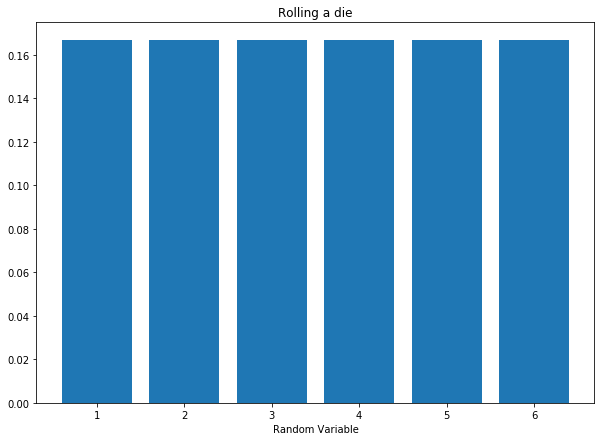

In [38]:
#Random variable 

X = list(range(1,7))
p = [1/6 for outcome in X]

plt.figure(figsize=(10,7))
plt.bar(X, p)
plt.xlabel('Random Variable')
plt.title('Rolling a die');

#### The cumulative distribution function (CDF)

Continuing with the die example, we can also plot out the **cumulative probability** of our six outcomes. This is known as the **cumulative distribution function** (often abbreviated $cdf$). We can get this by starting at the minimum possible outcome, then add the probability of each outcome. Thus, each point on a cumulative distribution function represents the probability that a random variable is less than or equal to that value.

In a formula, if the $pmf$ is given by $f(x) = P(X = x)$, we write the $cdf$ as $F(x) = P(X \leq x)$.

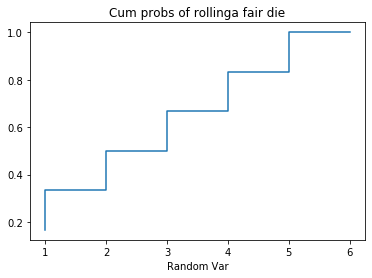

In [39]:
# np cumulative sum example
cum_probs = np.cumsum(p)
cum_probs

plt.step(X, cum_probs)
plt.title("Cum probs of rollinga fair die")
plt.xlabel("Random Var");

We can simultaneously visualize the probability density/mass function and the cumulative distribution function [here](http://students.brown.edu/seeing-theory/).

### Practice: Deck of cards
---

A deck of cards contains the values Ace-King. How would we represent these as a random variable (**remember, each value needs to map to the number line**)?

Plot the probability mass function (pmf) of drawing a single value (Ace-King) from a fair deck.

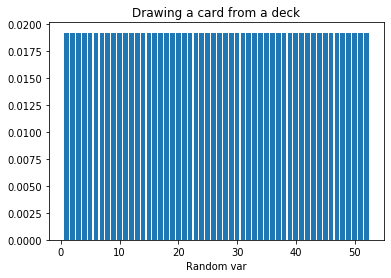

In [32]:
cards = list(range(1,53))
cards_probs = [1/52 for c in cards]

plt.bar(cards, cards_probs)
plt.title("Drawing a card from a deck")
plt.xlabel("Random var");

Now plot the cumulative distribution function (cdf) as a step chart.

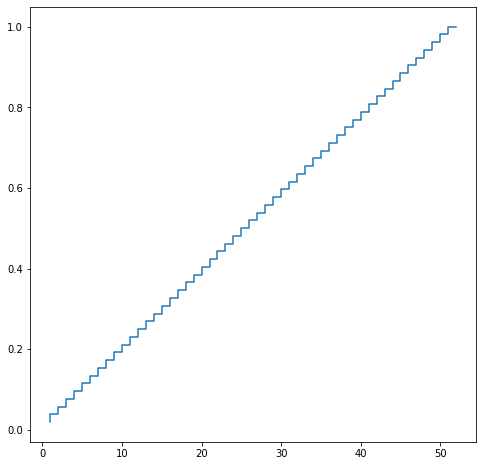

In [37]:
cum_sum_cards = np.cumsum(cards_probs)
plt.figure(figsize=(8,8))
plt.step(cards, cum_sum_cards)

What is the probability of drawing a 6 or less (assume Ace is low)?

## The Bernoulli distribution

---

**Example**: I flip a coin with some fixed probability of success $p$. What's the likelihood that I flip heads?

When to use this distribution:

- When your outcome is binary (i.e., two outcomes, say, `1 = success` and `0 = failure`)
- When there is a constant probability of success $p$.

Parameters of this distribution:

- probability of success $p$

Some common examples of a Bernoulli random variable:

- A coin flip.
- Whether or not it will rain tomorrow.
- Whether a user will buy your product after visiting your website.

Bernoulli distributed variables are very common and will appear continually throughout the course, especially in   classification.

#### Bernoulli pmf

The probability mass function $f$ for outcomes $x$ and probabilities $p$ is:

$$  f(x|p) =
    \begin{cases}
    p & \text{for }x=1 \\
    1-p & \text{for }x=0 \\ 
    0 & \text{elsewhere} \\
    \end{cases}
$$

In the cell below, let's plot the pmf of an unfair coin-flip, where $p = 0.25$.

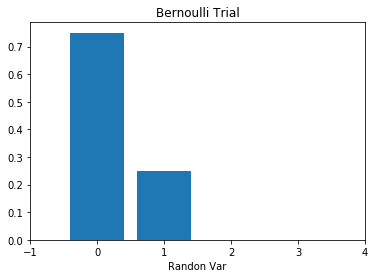

In [49]:
bern_outcomes = [0, 1]
p=0.25
bern_probs = [1-p , p]

plt.figure()
plt.bar(bern_outcomes, bern_probs)
plt.title("Bernoulli Trial")
plt.xlabel("Randon Var")
plt.xlim(-1,4);

#### Bernoulli CDF

Its cumulative distribution function is also defined as a function of $x$ outcomes with $p$ probabilities:

$$ F(x|p) =
\begin{cases}
    0 & \text{for }x<0 \\ 1 - p & \text{for }0 \leq x < 1 \\ 1 & \text{for }x\geq 1
\end{cases} $$

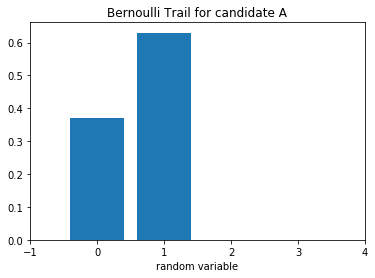

In [52]:
can_outcomes = [0, 1]
p = 0.63
bern_probs = (1-p, p)

plt.figure()
plt.bar(can_outcomes, bern_probs)

plt.xlabel ("random variable")
plt.title ("Bernoulli Trail for candidate A")
plt.xlim (-1, 4);

### Practice: Election outcomes
---

Candidate A is ahead in the polls. She has a 63% chance of winning the election. Plot the Bernoulli distribution of Candidate A's chances as a bar chart.

<a id='bernoulli'></a>

## The Binomial distribution

---

**Example**: I flip a coin with some fixed probability of success $p$. I flip the same coin $k$ times. What is the proability of getting a certain number of heads?

The binomial distribution is directly related to the Bernoulli distribution: it is **the sum of successes of a Bernoulli distributed random variable.**

When it's used:

- when you have fixed $n$ independent Bernoulli trials.

More explicitly:

- when you have fixed $n$ trials,
- each trial is independent of one another,
- when you have a constant probability of success $p$, and
- when you have a binary outcome.

Parameters of the distribution:

- probability of success $p$
- number of trials $n$
 

#### Binomial pmf

The $pmf$ is a function of $n$ trials with $p$ probability of success and $x$ successes in those trials:

$$ f(x|n,p) = P(X = x) = \binom n x  p^x(1-p)^{n-x} $$

Which describes the probability that there will be $x$ successes in $n$ trials.

Below is the binomial pmf for 50 coin flips of a coin with probability of getting heads at 25%.


In [65]:
coin_dist.pmf(heads).tolist()

[[5.663216564269385e-07,
  9.438694273782367e-06,
  7.70826699025551e-05,
  0.0004111075728136192,
  0.0016101713268533865,
  0.004937858735683542,
  0.012344646839209359,
  0.025864974329771733,
  0.04634141234084167,
  0.072086641419086,
  0.09851840993941652,
  0.1194162544720215,
  0.12936760901135547,
  0.12605049083158104,
  0.11104448001829342,
  0.08883558401463577,
  0.06477594667733891,
  0.043183964451558074,
  0.026390200498175018,
  0.014815551156870204,
  0.007654701431049567,
  0.0036450959195474504,
  0.001601633055558687,
  0.0006499380515310747,
  0.00024372676932415152,
  8.449194669903904e-05,
  2.708075214712788e-05,
  8.023926562112023e-06,
  2.197027511054448e-06,
  5.555701752091817e-07,
  1.2963304088214166e-07,
  2.787807330798748e-08,
  5.517535342205864e-09,
  1.0031882440374085e-09,
  1.6719804067290567e-10,
  2.5477796673966526e-11,
  3.5385828713841776e-12,
  4.463077495439684e-13,
  5.089474336904732e-14,
  5.2199736788767e-15,
  4.784975872303589e-16,
 

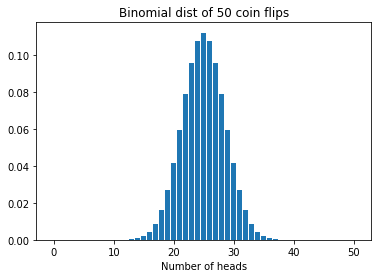

In [74]:
heads = range(0,51)
n_flips = 50 
p_head = 0.5

coin_dist = stats.binom(n_flips, p_head)
plt.figure()
plt.bar(heads, coin_dist.pmf(heads))
plt.xlabel("Number of heads")
plt.title("Binomial dist of 50 coin flips");

#### Binomial cdf

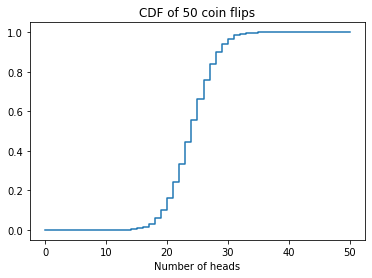

In [73]:
plt.step(heads, coin_dist.cdf(heads))
plt.xlabel("Number of heads")
plt.title("CDF of 50 coin flips");

### Practice: Elections
---

Candidate A is now leading the polls at 55%. If we survey 100 people at random, plot a **pmf** of all possible outcomes as a bar chart.

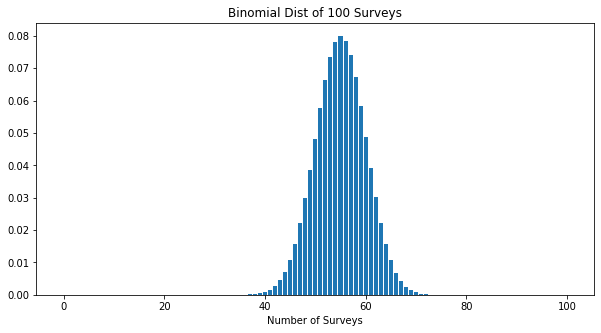

In [87]:
surveys = list(range(0,101))
n_surveys = 100
p_polls = 0.55

survey_dist = stats.binom(n_surveys, p_polls)

plt.figure(figsize=(10,5))
plt.bar(surveys, survey_dist.pmf(surveys))
plt.xlabel('Number of Surveys')
plt.title('Binomial Dist of 100 Surveys');

Now plot the the **cumulative distribution** of all possible outcomes as a step chart.

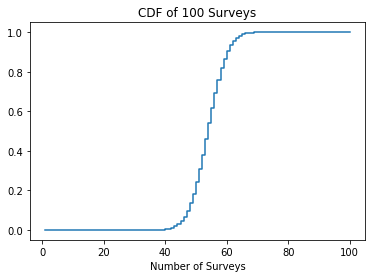

In [79]:
plt.step(surveys,  survey_dist.cdf(surveys))
plt.xlabel('Number of Surveys')
plt.title('CDF of 100 Surveys');

### Practice: Siblings

---

I'm the oldest of 6 kids. However, I only have one sister. Assuming a 50/50 chance of having a boy or a girl, plot the **pmf** of possible daughters as a bar chart.

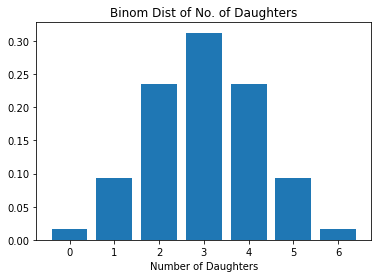

In [83]:
daughters=list(range(0,7))
n=6
p=0.5

girl_dist=stats.binom(n, p)
plt.figure()
plt.bar(daughters, girl_dist.pmf(daughters))
plt.title("Binom Dist of No. of Daughters")
plt.xlabel("Number of Daughters");

Plot the **cdf** of the previous example as a step chart.

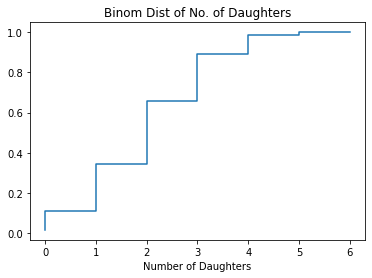

In [84]:
plt.figure()
plt.step(daughters,girl_dist.cdf(daughters))
plt.title("Binom Dist of No. of Daughters")
plt.xlabel("Number of Daughters");

## The Poisson distribution

---

The Poisson distribution represents the counts of "positive" events, or successes, within a time span. It shares a relationship with Bernoulli random variables and the Binomial distribution. 

A Bernoulli random variable represents the probability that an event will occur during a "trial". Imagine we had a Bernoulli random variable that was the probability of a user visiting our site between 12pm and 1pm. If we change this to be between 12pm and 12:15pm, this remains a Bernoulli random variable but the probability has decreased. As the time frame shrinks, the probability shrinks as well.

The Poisson distribution represents infinitely many infinitely small probability trials. Our number of trials $n$ increases to infinity and the probability of success $p$ shrinks towards zero in a specific way. 

More formally, if we take the Binomial distribution and examine its behavior when $n\rightarrow\infty$ and $p\rightarrow 0$, we get the Poisson distribution.

When we use this:

- when the number of successes is is a non-negative integer,
- when events occur independently,
- when the rate at which events occur is constant,
- when two events cannot occur at exactly the same instant, and
- the probability of an event occurring in an interval is proportional to the length of the interval.

Parameters of the distribution:

- rate of event occurring $\lambda$

#### Poisson pmf

$$f(x|\lambda) = P(X=x) = \frac{\lambda^x e^{-\lambda}}{x!} $$

Where $x$ is the number of events that occur in an interval,

and $\lambda$ is the rate at which events occur.

Let's say, for example, we are measuring visitors to our website. What is the probability mass function of the Poisson distribution for visitor counts given we have an average rate of 5 visitors per hour?

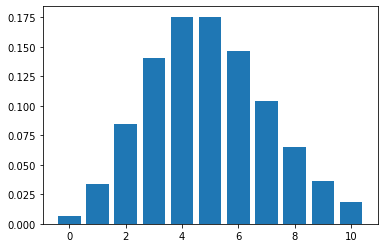

In [98]:
num_visitors = 5
visitor_dist = stats.poisson(num_visitors)

possible_visitors = list(range(0,11))

plt.figure()
plt.bar(possible_visitors, visitor_dist.pmf(possible_visitors));

**Check**: What do you notice or recognize about this?

#### Poisson cdf

The cumulative distribution is given by the formula:

### $$ e^{-\lambda} \sum_{i=0}^{\lfloor x\rfloor} \frac{\lambda^i}{i!} $$

Where the $\lfloor x\rfloor$ represents the greatest integer less than or equal to $x$.

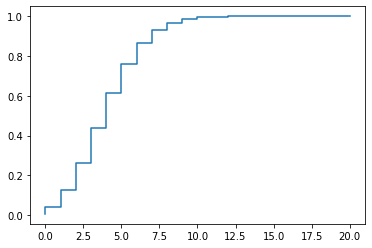

In [95]:
plt.step(possible_visitors, visitor_dist.cdf(possible_visitors))

## Conclusion

By the end of this lesson, students should be able to:
- Define distribution and random variable.
- Describe the difference between discrete and continuous random variables.
- Understand the difference between probability mass functions and cumulative distribution functions.
- Give examples of the following distributions: Discrete Uniform, Bernoulli, Binomial, and Poisson.

<details>
<summary>What is a distribution?</summary>
<li> A distribution is the set of all values of a variable and how frequently we observe them.
</details>
<br>
<details>
<summary>What is a random variable?</summary>
<li> A random variable is a function that takes our sample space $\mathcal{S}$ and maps it to the real number line.
</details>
<br>
<details>
<summary>What is the difference between a discrete and continuous random variable?</summary>
<li> A discrete random variable has a countable sample space; a continuous random variable has a sample space that is not countable.
</details>
<br>
<details>
<summary>What is the difference between a probability mass function and a cumulative distribution function? </summary>
<li> A probability mass function gives us the probability of that particular value of the random variable occurring. The cumulative mass function gives us the probability of that particular value and all values below it.
</details>
<br>
<details>
<summary>What is the Discrete Uniform distribution? </summary>
<li> The discrete uniform distribution is appropriate for an experiment where all outcomes are equally likely.
<li> Examples include:
<ul>
<li> the number of heads tossed with one coin (0 and 1 both occur 50% of the time)
<li> the value rolled with one die (numbers 1 through 6 each occur exactly 1/6 of the time)
</ul>
</details>
<br>
<details>
<summary>What is the Bernoulli distribution? </summary>
<li> The Bernoulli distribution is appropriate for an experiment with two outcomes and a fixed probability of success $p$.
<li> Examples include:
<ul>
<li> the number of heads tossed with one coin (0 and 1 both occur 50% of the time)
<li> the number of correct answers a randomly guessing person gets on one multiple choice question with four choices (1 occurs 25% of the time; 0 occurs 75% of the time)
</ul>
</details>
<br>
<details>
<summary>What is the Binomial distribution? </summary>
<li> The Binomial distribution is appropriate for a sum of Bernoulli random variables, or where we have $n$ independent experiments with two outcomes and a fixed probability of success $p$.
<li> Examples would include:
<ul>
<li> the number of heads tossed with $n$ coins
<li> the number of correct answers a randomly guessing person gets on on $n$ multiple choice questions with four choices each
</ul>
</details>
<br>
<details>
<summary>What is the Poisson distribution? </summary>
<li> Whereas the Binomial distribution is appropriate for an experiment counting the number of successes out of a fixed number of trials, the Poisson distribution is appropriate for an experiment counting the number of successes in a fixed interval.
<li> Getting into the theory, if we took a Binomial distribution, let the number of trials $n$ go to infinity, and the probability of success $p$ approach 0, then we get a Poisson distribution.
<li> Examples would include:
<ul>
<li> the number of calls received at a call center in five minutes
<li> the count of people who go to my website in one day
</ul>
</details>

